In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_Serbia = df[(df['job_country'] == 'Serbia') & (df['job_title_short'] == 'Data Analyst')].copy()


In [3]:
df_DA_Serbia = df_DA_Serbia.dropna(subset=['salary_year_avg'])
df_DA_Serbia_explode = df_DA_Serbia.explode('job_skills')
df_DA_Serbia_explode[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
563959,53014.0,sql
563959,53014.0,r
563959,53014.0,sas
563959,53014.0,sas
563959,53014.0,python


In [4]:
df_DA_skills = df_DA_Serbia_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})
DA_job_count = len(df_DA_Serbia)
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100
df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,3,102500.0,75.0
c#,2,79007.0,50.0
excel,2,77757.0,50.0
power bi,2,103750.0,50.0
python,2,79007.0,50.0
sas,2,53014.0,50.0
go,1,102500.0,25.0
oracle,1,56700.0,25.0
r,1,53014.0,25.0


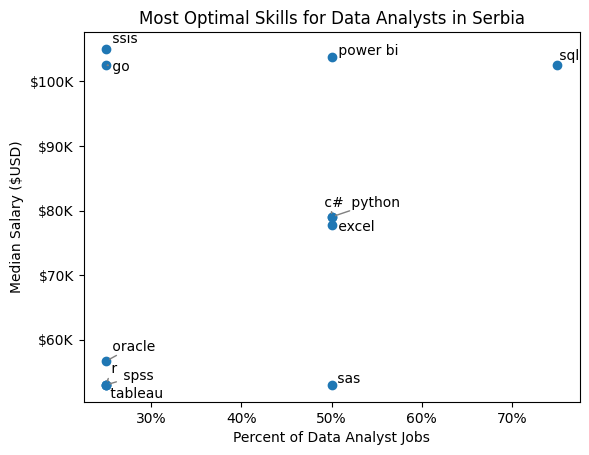

In [5]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

plt.scatter(df_DA_skills['skill_percent'], df_DA_skills['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)') 
plt.title('Most Optimal Skills for Data Analysts in Serbia')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')) 
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills.index):
    texts.append(plt.text(df_DA_skills['skill_percent'].iloc[i], df_DA_skills['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()